In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

# Step 1 : Read the dataset

In [7]:
df = pd.read_csv('Algerian_for_forestFire_final_for_project.csv')

In [8]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


# Step 2 : Feature Engineering

<AxesSubplot: >

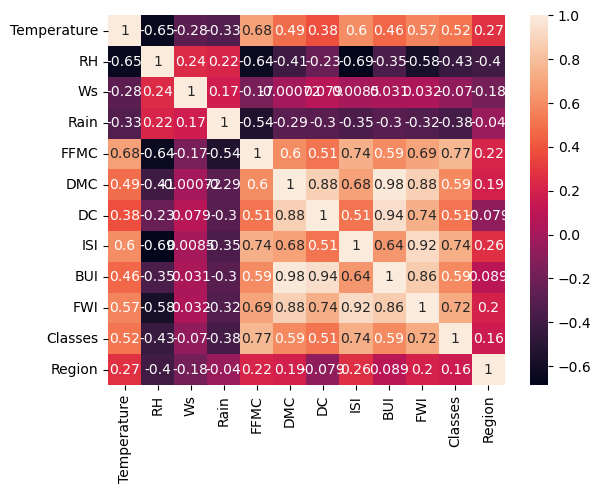

In [10]:
sns.heatmap(df.corr(), annot = True)

### Removing all multicoorelated features

In [58]:
def correlation(dataset , threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        
        for j in range(i) :
             
            if abs(corr_matrix.iloc[i,j]) > threshold:
                    colname = corr_matrix.columns[i]
                    col_corr.add(colname)
    return col_corr      

In [59]:
corr_matrix.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

# step 3 : break dataset into dependent and independent fetures

In [77]:
X = df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
        'Classes', 'Region']]

In [78]:
X.shape

(243, 11)

In [79]:
y = df['FWI']

In [80]:
corr_feature = correlation(X,0.85)

In [84]:
corr_feature = list(corr_feature)
corr_feature

['DC', 'BUI']

In [82]:
X.drop(corr_feature,inplace = True, axis = 1 ) # dropping columns

/tmp/ipykernel_4075/713426917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(corr_feature,inplace = True, axis = 1 )


In [85]:
X.shape

(243, 9)

# Step 4 Breaking dataset into Training & testing dataset

In [87]:
from sklearn.model_selection import train_test_split


In [100]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.20 ,random_state = 42)

In [101]:
X_train.shape,X_test.shape,y_train.shape, y_test.shape

((194, 9), (49, 9), (194,), (49,))

# Step 5 : Standarization

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
scaler = StandardScaler()


In [104]:
X_train_scaled = scaler.fit_transform(X_train)

In [105]:
X_test_scaled = scaler.transform(X_test)

### Box plot to understand StandarScaler

/tmp/ipykernel_4075/2253365602.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


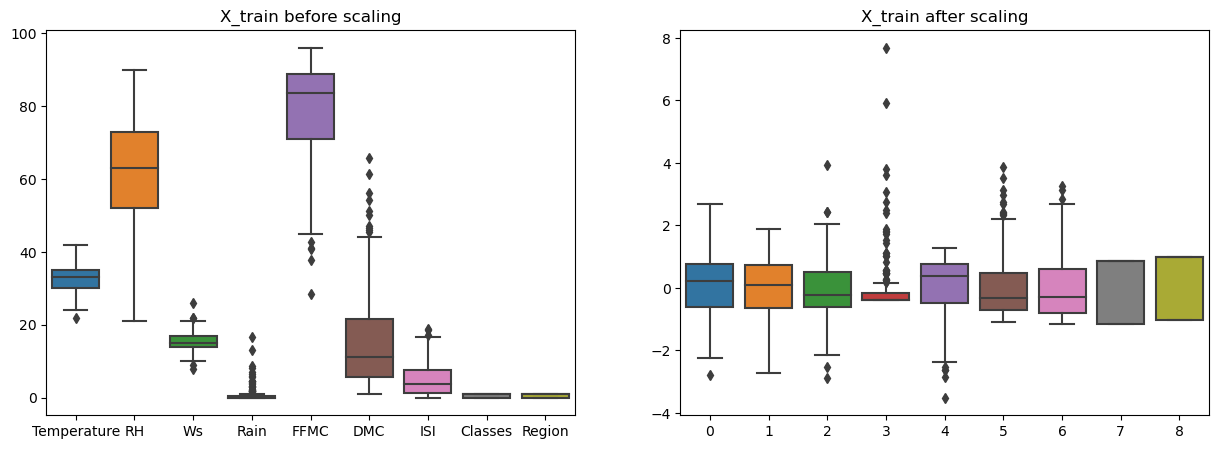

In [111]:
plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data = X_train_scaled)
plt.title("X_train after scaling")
plt.show()




# Linear Regression model trainging

In [112]:
from sklearn.linear_model import LinearRegression

In [113]:
regressor = LinearRegression()


In [116]:
regressor.fit(X_train_scaled,y_train)

LinearRegression()

In [118]:
y_pred_test = regressor.predict(X_test_scaled)

In [120]:
y_pred_test

array([ 8.22519075e+00,  7.79202229e+00, -2.78790834e-01,  4.35255873e+00,
        6.66767055e+00,  1.40854770e+00,  1.99494070e+00,  7.80961600e+00,
        1.73112949e+00,  3.30891017e+00,  3.45283141e-01,  9.71807910e+00,
        9.35128249e+00,  1.70641667e+01,  1.85271023e+01,  1.24547438e+00,
        1.91190325e+00,  1.15292017e-02,  7.19193092e+00,  3.07552423e+00,
        1.43106426e+00,  2.28565630e-01,  6.60694070e+00,  3.12916618e-01,
        2.11965139e+01,  5.13996171e+00,  5.92667011e+00,  9.81755385e+00,
       -2.52764587e-02,  9.81141259e+00,  6.59659846e+00, -4.24797540e-01,
        1.03857529e+01,  1.45659625e+01,  1.48302531e+00,  4.32843721e-01,
        2.01268203e+00,  6.07941922e+00, -4.77057528e-01, -4.29405448e-01,
        6.69939047e+00,  1.83829007e+00,  8.62235208e+00, -2.55650163e-01,
        1.55137765e+01,  8.31680623e+00,  8.20529717e+00,  1.43655762e+00,
        1.29816715e+01])

In [122]:
y_test

24      8.4
6       7.2
152     0.5
232     3.8
238     6.5
175     0.7
215     2.5
150     7.2
9       0.9
113     2.8
45      0.4
209     6.1
227     9.8
170    17.3
82     20.4
161     1.3
236     0.4
15      0.0
66      6.8
127     3.1
33      1.7
19      0.4
108     5.9
30      0.4
185    20.9
164     4.7
10      5.6
73     10.2
93      0.0
155     9.9
111     6.3
217     0.4
25     10.6
60     15.7
18      1.4
126     0.9
96      1.7
196     5.5
137     0.1
240     0.2
75      6.3
117     1.7
112     8.3
16      0.0
195    15.7
67      8.0
167     7.7
38      0.6
180    13.2
Name: FWI, dtype: float64

In [125]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [127]:
mse = mean_squared_error(y_test, y_pred_test)

In [128]:
mse

0.5882990110708681

In [129]:
mae = mean_absolute_error(y_test, y_pred_test)

In [130]:
mae

0.504997869416568

In [131]:
rmse = np.sqrt(mse)

In [132]:
rmse

0.7670065260940536

In [134]:
from sklearn.metrics import r2_score

In [135]:
r2 = r2_score(y_test, y_pred_test)

In [136]:
r2

0.9805895859259882

In [137]:
absolute_r2 = 1 - ((1-r2)*(len(X_test)-1)) /(len(X_test)-len(X_test.columns)-1)

In [138]:
absolute_r2 

0.9761102596012162

# Lasso Regression 

In [139]:
from sklearn.linear_model import Lasso

In [140]:
lasser = Lasso()

In [142]:
lasser.fit(X_train_scaled,y_train)

Lasso()

In [143]:
y_pred_lasso = lasser.predict(X_test_scaled)

In [144]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

In [145]:
mse

0.5882990110708681

In [146]:
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

In [147]:
mae_lasso 

1.0093958923873407

In [148]:
rmse = np.sqrt(mse_lasso)

In [149]:
rmse

1.31378930008702

In [151]:
r2_lasso = r2_score(y_test,y_pred_lasso)

In [152]:
r2_lasso

0.9430507350726562

# Ridge Regression

In [154]:
from sklearn.linear_model import Ridge

In [155]:
ridge_regressor = Ridge()

In [158]:
ridge_regressor.fit(X_train_scaled,y_train)

Ridge()

In [159]:
y_pred_ridge = ridge_regressor.predict(X_test_scaled)

In [160]:
mae = mean_absolute_error(y_test, y_pred_ridge)

In [161]:
mae

0.5192048325844797

In [162]:
r2_ridge = r2_score(y_test , y_pred_ridge)

In [163]:
r2_ridge

0.9801058063273599

In [165]:
from sklearn.linear_model import ElasticNet
elastic_regressor = ElasticNet()
elastic_regressor.fit(X_train_scaled,y_train)
y_pred_elastic = elastic_regressor.predict(X_test_scaled)
mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test , y_pred_elastic)

In [166]:
mae_elastic

1.6834416340136709

In [167]:
r2_elastic

0.8676961352267807

# Picle file of ridge regression

In [169]:
import pickle 

In [170]:
ridge_regressor

Ridge()

In [171]:
scaler

StandardScaler()

In [172]:
pickle.dump(ridge_regressor, open("Ridge_regressor.pkl", 'wb'))

In [ ]:
pickle.dump(scaler, open("Ridge_r.pkl", 'wb'))